In [52]:
import pandas as pd

url = "https://raw.githubusercontent.com/Safira-SM/Submission-Sentiment/refs/heads/main/shopee.csv"

app_review_df = pd.read_csv(url)
app_review_df.shape
app_review_df.head()
app_review_df.to_csv('shopee.csv', index=False)

In [53]:
jumlah_ulasan, jumlah_kolom = app_review_df.shape

print("Jumlah Ulasan:", jumlah_ulasan)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Ulasan: 3000
Jumlah Kolom: 10


In [54]:
app_review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,5bd2cb2d-981f-499b-8287-e3d91df21da9,Liyana nuryati,https://play-lh.googleusercontent.com/a/ACg8oc...,maaf kasi rating 1. Karena shope benar-benar m...,1,23,3.48.28,2025-04-23 05:25:57,"Hi kak Liyana nuryati, maafudah buat gak nyama...",2025-04-23 06:35:08
1,7f543a99-8ada-4dc5-9cca-dd95ef00eec8,Triputranto,https://play-lh.googleusercontent.com/a-/ALV-U...,Setiap aplikasi dibuka selalu muncul video yg ...,1,13,3.48.28,2025-04-23 17:51:50,"Hi Kak Triputranto , maaf ya untuk kendala apl...",2025-04-23 18:26:50
2,d907638e-4c4c-4ac7-9747-7dd5e505b1b1,Deni Setiawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Shopee Video sangat mengganggu, ketika membuka...",3,8,3.48.28,2025-04-23 14:04:35,"Hi Kak Deni Setiawan , maaf bgt ya buat kmu re...",2025-04-23 15:48:43
3,0057342d-0471-4b03-bee5-c039e7cfc3da,adspro aditya,https://play-lh.googleusercontent.com/a-/ALV-U...,Harga sangat bersaing dgn aplikasi belanja lai...,4,7,3.47.39,2025-04-23 11:15:34,"Hi kak adspro aditya, makasih ya buat bintang ...",2025-04-23 12:31:20
4,38f40f88-d81e-4b06-9dba-31957712618f,[ADIT] アディティア (Aditya),https://play-lh.googleusercontent.com/a-/ALV-U...,Shopee semakin lama semakin menurun kualitas n...,2,16,3.48.28,2025-04-22 12:46:49,NaN,NaN


In [55]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              3000 non-null   object
 1   userName              3000 non-null   object
 2   userImage             3000 non-null   object
 3   content               3000 non-null   object
 4   score                 3000 non-null   int64 
 5   thumbsUpCount         3000 non-null   int64 
 6   reviewCreatedVersion  3000 non-null   object
 7   at                    3000 non-null   object
 8   replyContent          2658 non-null   object
 9   repliedAt             2658 non-null   object
dtypes: int64(2), object(8)
memory usage: 234.5+ KB


In [56]:
clean_df = app_review_df.dropna()

In [57]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2658 non-null   object
 1   userName              2658 non-null   object
 2   userImage             2658 non-null   object
 3   content               2658 non-null   object
 4   score                 2658 non-null   int64 
 5   thumbsUpCount         2658 non-null   int64 
 6   reviewCreatedVersion  2658 non-null   object
 7   at                    2658 non-null   object
 8   replyContent          2658 non-null   object
 9   repliedAt             2658 non-null   object
dtypes: int64(2), object(8)
memory usage: 228.4+ KB


In [58]:
clean_df = clean_df.drop_duplicates()

In [59]:
import shutil
import nltk

shutil.rmtree('/root/nltk.data', ignore_errors=True)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
def cleaningText(text):
  text = re.sub(r'@[A-a-z0-9]+', '', text)
  text = re.sub(r'#[A-a-z0-9]+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)

  text = text.replace('\n', '')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip(' ')
  return text

def casefoldingText(text):
  text = text.lower()
  return text

def tokenizingText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
  factory = stemmerFactoy()
  stemmer = factory.create_stemmer()

  words = text.split()

  stemmed_words = [stemmer.stem(word) for word in words]

  stemmed_text = ' '.join(stemmed_words)

  return stemmed_text

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [62]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,5bd2cb2d-981f-499b-8287-e3d91df21da9,Liyana nuryati,https://play-lh.googleusercontent.com/a/ACg8oc...,maaf kasi rating 1. Karena shope benar-benar m...,1,23,3.48.28,2025-04-23 05:25:57,"Hi kak Liyana nuryati, maafudah buat gak nyama...",2025-04-23 06:35:08
1,7f543a99-8ada-4dc5-9cca-dd95ef00eec8,Triputranto,https://play-lh.googleusercontent.com/a-/ALV-U...,Setiap aplikasi dibuka selalu muncul video yg ...,1,13,3.48.28,2025-04-23 17:51:50,"Hi Kak Triputranto , maaf ya untuk kendala apl...",2025-04-23 18:26:50
2,d907638e-4c4c-4ac7-9747-7dd5e505b1b1,Deni Setiawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Shopee Video sangat mengganggu, ketika membuka...",3,8,3.48.28,2025-04-23 14:04:35,"Hi Kak Deni Setiawan , maaf bgt ya buat kmu re...",2025-04-23 15:48:43
3,0057342d-0471-4b03-bee5-c039e7cfc3da,adspro aditya,https://play-lh.googleusercontent.com/a-/ALV-U...,Harga sangat bersaing dgn aplikasi belanja lai...,4,7,3.47.39,2025-04-23 11:15:34,"Hi kak adspro aditya, makasih ya buat bintang ...",2025-04-23 12:31:20
5,54df2b65-5871-472a-b37a-c2dd32bb35c8,Dide Naufal,https://play-lh.googleusercontent.com/a/ACg8oc...,"tolong jika status pesanan sudah ""Dalam pengan...",5,4164,3.47.39,2025-04-07 04:32:26,"Hai kak Dide Naufal, maaf ya buat kamu gak nya...",2025-04-07 05:20:14
...,...,...,...,...,...,...,...,...,...,...
2991,a366cd27-cb4f-47ed-90f1-bbb01f3e5db8,jamal Udin,https://play-lh.googleusercontent.com/a-/ALV-U...,cukup baik..ttp saya pernah pasan barang tp pi...,4,0,3.48.28,2025-04-23 13:29:16,"Hai kak jamal Udin , maaf buat kamu ga nyaman ...",2025-04-23 14:24:42
2995,b124eb67-ab6e-4a45-802c-2c43ab9dc608,Abaos 8,https://play-lh.googleusercontent.com/a/ACg8oc...,"akun lama sudahku hapus, login ke akun baru ve...",1,0,3.47.37,2025-04-01 07:59:35,"Hai kak, maaf buat km ga nyaman. Pastikan kone...",2024-05-30 03:36:37
2997,b8fbf3e2-cc44-49c9-9585-51ee8338e4be,AINUL AINUL MUNAWAR SIREGAR,https://play-lh.googleusercontent.com/a/ACg8oc...,"sebenarnya saya suka dengan aplikasi ini,sanga...",4,0,3.47.39,2025-04-10 23:30:09,"Hai kak AINUL AINUL MUNAWAR SIREGAR, maaf ya u...",2025-04-11 00:46:38
2998,17fd4531-7b5f-41fe-9dd2-643ffc27da85,Vivi Rahayu,https://play-lh.googleusercontent.com/a/ACg8oc...,"belanja aman dan nyaman, trimakasih shopee sel...",5,0,3.48.28,2025-04-17 05:05:11,"Hi kak , maaf yah kak atas ketidaknyamanannya....",2022-12-08 15:20:48


In [63]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_tokenizing'] = clean_df['text_casefolding'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizing'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [64]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,text_clean,text_casefolding,text_tokenizing,text_stopword,text_akhir
0,5bd2cb2d-981f-499b-8287-e3d91df21da9,Liyana nuryati,https://play-lh.googleusercontent.com/a/ACg8oc...,maaf kasi rating 1. Karena shope benar-benar m...,1,23,3.48.28,2025-04-23 05:25:57,"Hi kak Liyana nuryati, maafudah buat gak nyama...",2025-04-23 06:35:08,maaf kasi rating Karena shope benarbenar meng...,maaf kasi rating karena shope benarbenar meng...,"[maaf, kasi, rating, karena, shope, benarbenar...",[maaf],maaf
1,7f543a99-8ada-4dc5-9cca-dd95ef00eec8,Triputranto,https://play-lh.googleusercontent.com/a-/ALV-U...,Setiap aplikasi dibuka selalu muncul video yg ...,1,13,3.48.28,2025-04-23 17:51:50,"Hi Kak Triputranto , maaf ya untuk kendala apl...",2025-04-23 18:26:50,Setiap aplikasi dibuka selalu muncul video yg ...,setiap aplikasi dibuka selalu muncul video yg ...,"[setiap, aplikasi, dibuka, selalu, muncul, vid...",[],
2,d907638e-4c4c-4ac7-9747-7dd5e505b1b1,Deni Setiawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Shopee Video sangat mengganggu, ketika membuka...",3,8,3.48.28,2025-04-23 14:04:35,"Hi Kak Deni Setiawan , maaf bgt ya buat kmu re...",2025-04-23 15:48:43,Shopee Video sangat mengganggu ketika membuka ...,shopee video sangat mengganggu ketika membuka ...,"[shopee, video, sangat, mengganggu, ketika, me...",[shopee],shopee
3,0057342d-0471-4b03-bee5-c039e7cfc3da,adspro aditya,https://play-lh.googleusercontent.com/a-/ALV-U...,Harga sangat bersaing dgn aplikasi belanja lai...,4,7,3.47.39,2025-04-23 11:15:34,"Hi kak adspro aditya, makasih ya buat bintang ...",2025-04-23 12:31:20,Harga sangat bersaing dgn aplikasi belanja lai...,harga sangat bersaing dgn aplikasi belanja lai...,"[harga, sangat, bersaing, dgn, aplikasi, belan...",[harga],harga
5,54df2b65-5871-472a-b37a-c2dd32bb35c8,Dide Naufal,https://play-lh.googleusercontent.com/a/ACg8oc...,"tolong jika status pesanan sudah ""Dalam pengan...",5,4164,3.47.39,2025-04-07 04:32:26,"Hai kak Dide Naufal, maaf ya buat kamu gak nya...",2025-04-07 05:20:14,tolong jika status pesanan sudah Dalam pengant...,tolong jika status pesanan sudah dalam pengant...,"[tolong, jika, status, pesanan, sudah, dalam, ...",[tolong],tolong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,a366cd27-cb4f-47ed-90f1-bbb01f3e5db8,jamal Udin,https://play-lh.googleusercontent.com/a-/ALV-U...,cukup baik..ttp saya pernah pasan barang tp pi...,4,0,3.48.28,2025-04-23 13:29:16,"Hai kak jamal Udin , maaf buat kamu ga nyaman ...",2025-04-23 14:24:42,cukup baikttp saya pernah pasan barang tp piha...,cukup baikttp saya pernah pasan barang tp piha...,"[cukup, baikttp, saya, pernah, pasan, barang, ...",[],
2995,b124eb67-ab6e-4a45-802c-2c43ab9dc608,Abaos 8,https://play-lh.googleusercontent.com/a/ACg8oc...,"akun lama sudahku hapus, login ke akun baru ve...",1,0,3.47.37,2025-04-01 07:59:35,"Hai kak, maaf buat km ga nyaman. Pastikan kone...",2024-05-30 03:36:37,akun lama sudahku hapus login ke akun baru ver...,akun lama sudahku hapus login ke akun baru ver...,"[akun, lama, sudahku, hapus, login, ke, akun, ...",[akun],akun
2997,b8fbf3e2-cc44-49c9-9585-51ee8338e4be,AINUL AINUL MUNAWAR SIREGAR,https://play-lh.googleusercontent.com/a/ACg8oc...,"sebenarnya saya suka dengan aplikasi ini,sanga...",4,0,3.47.39,2025-04-10 23:30:09,"Hai kak AINUL AINUL MUNAWAR SIREGAR, maaf ya u...",2025-04-11 00:46:38,sebenarnya saya suka dengan aplikasi inisangat...,sebenarnya saya suka dengan aplikasi inisangat...,"[sebenarnya, saya, suka, dengan, aplikasi, ini...",[],
2998,17fd4531-7b5f-41fe-9dd2-643ffc27da85,Vivi Rahayu,https://play-lh.googleusercontent.com/a/ACg8oc...,"belanja aman dan nyaman, trimakasih shopee sel...",5,0,3.48.28,2025-04-17 05:05:11,"Hi kak , maaf yah kak atas ketidaknyamanannya....",2022-12-08 15:20:48,belanja aman dan nyaman trimakasih shopee sela...,belanja aman dan nyaman trimakasih shopee sela...,"[belanja, aman, dan, nyam

In [73]:
def label_sentiment(score):
  if score >= 3:
    return "positive"

  else:
    return "negative"

clean_df['sentiment'] = clean_df['score'].apply(label_sentiment)
print(clean_df[['content', 'sentiment']])

                                                content sentiment
0     maaf kasi rating 1. Karena shope benar-benar m...  negative
1     Setiap aplikasi dibuka selalu muncul video yg ...  negative
2     Shopee Video sangat mengganggu, ketika membuka...  positive
3     Harga sangat bersaing dgn aplikasi belanja lai...  positive
5     tolong jika status pesanan sudah "Dalam pengan...  positive
...                                                 ...       ...
2991  cukup baik..ttp saya pernah pasan barang tp pi...  positive
2995  akun lama sudahku hapus, login ke akun baru ve...  negative
2997  sebenarnya saya suka dengan aplikasi ini,sanga...  positive
2998  belanja aman dan nyaman, trimakasih shopee sel...  positive
2999  parah pengiriman bener bener kacau,paket estim...  negative

[2658 rows x 2 columns]


In [66]:
label_sentiment_positive = [
    'bagus', 'mantap', 'puas', 'cepat', 'murah', 'recommended',
    'top', 'baik', 'senang', 'oke', 'love', 'mantabb', 'cukup',
    'biasa', 'standar', 'netral', 'lumayan'
]

label_sentiment_negative = [
    'buruk', 'lama', 'jelek', 'mahal', 'kecewa', 'parah', 'rusak',
    'susah', 'lemot', 'gagal', 'error'
]

In [74]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in label_sentiment_positive):
      score = score + 1

  for word in text:
    if (word in label_sentiment_negative):
      score = score - 1


  if (score > 0):
    polarity = "positive"
  else:
    polarity = "negative"

  return score, polarity

In [75]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
clean_df['polarity_score'] = results.apply(lambda x: x[0])
clean_df['polarity'] = results.apply(lambda x: x[1])
print(clean_df['polarity'].value_counts())

polarity
negative    2604
positive      54
Name: count, dtype: int64


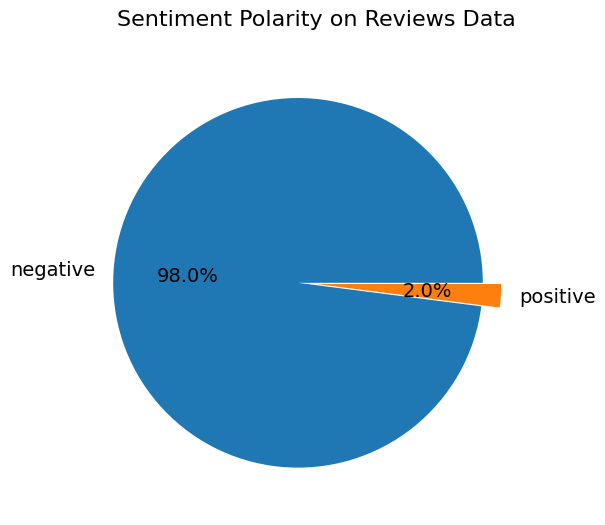

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
sizes = clean_df['polarity'].value_counts().tolist()
labels = clean_df['polarity'].value_counts().index.tolist()
explode = [0.1] + [0]*(len(labels)-1)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Reviews Data', fontsize=16, pad=20)

plt.show()

In [77]:
pd.set_option('display.max_colwidth', 3000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1
positive_tweets.head(10)

,text_akhir,polarity_score,polarity,text_stopword
1,bagus,1,positive,[bagus]
2,oke,1,positive,[oke]
3,lumayan,1,positive,[lumayan]
4,oke,1,positive,[oke]
5,bagus,1,positive,[bagus]
6,bagus,1,positive,[bagus]
7,bagus,1,positive,[bagus]
8,senang,1,positive,[senang]
9,senang,1,positive,[senang]
10,bagus,1,positive,[bagus]


In [79]:
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1
negative_tweets.head(10)

,text_akhir,polarity_score,polarity,text_stopword
1,parah,-1,negative,[parah]
2,kecewa,-1,negative,[kecewa]
3,kecewa,-1,negative,[kecewa]
4,buruk,-1,negative,[buruk]
5,parah,-1,negative,[parah]
6,jelek,-1,negative,[jelek]
7,parah,-1,negative,[parah]
8,kecewa,-1,negative,[kecewa]
9,kecewa,-1,negative,[kecewa]
10,parah,-1,negative,[parah]


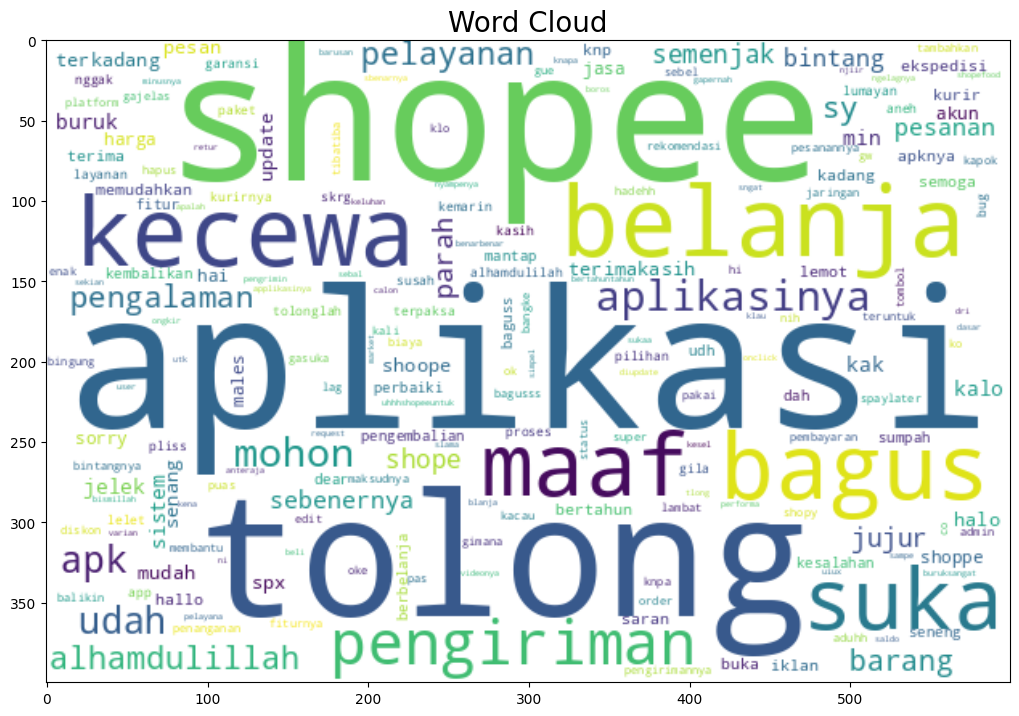

In [86]:
from wordcloud import WordCloud

list_word =''

for tweet in clean_df['text_stopword']:
  for word in tweet:
      list_word += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(list_word)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Word Cloud', fontsize=20)
ax.imshow(wordcloud, interpolation='bilinear')
fig.tight_layout(pad=0)
plt.show()

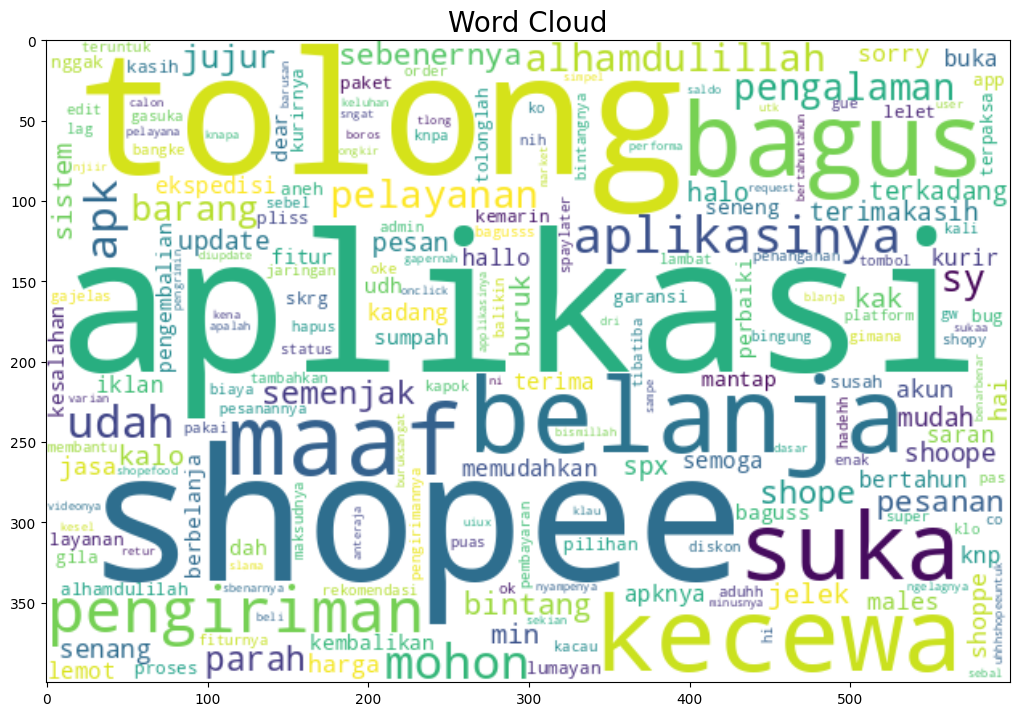

In [87]:
list_word = ''

for tweet in clean_df['text_stopword']:
  for word in tweet:
    list_word += " " + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(list_word)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Word Cloud', fontsize=20)
ax.imshow(wordcloud, interpolation='bilinear')
fig.tight_layout(pad=0)
plt.show()

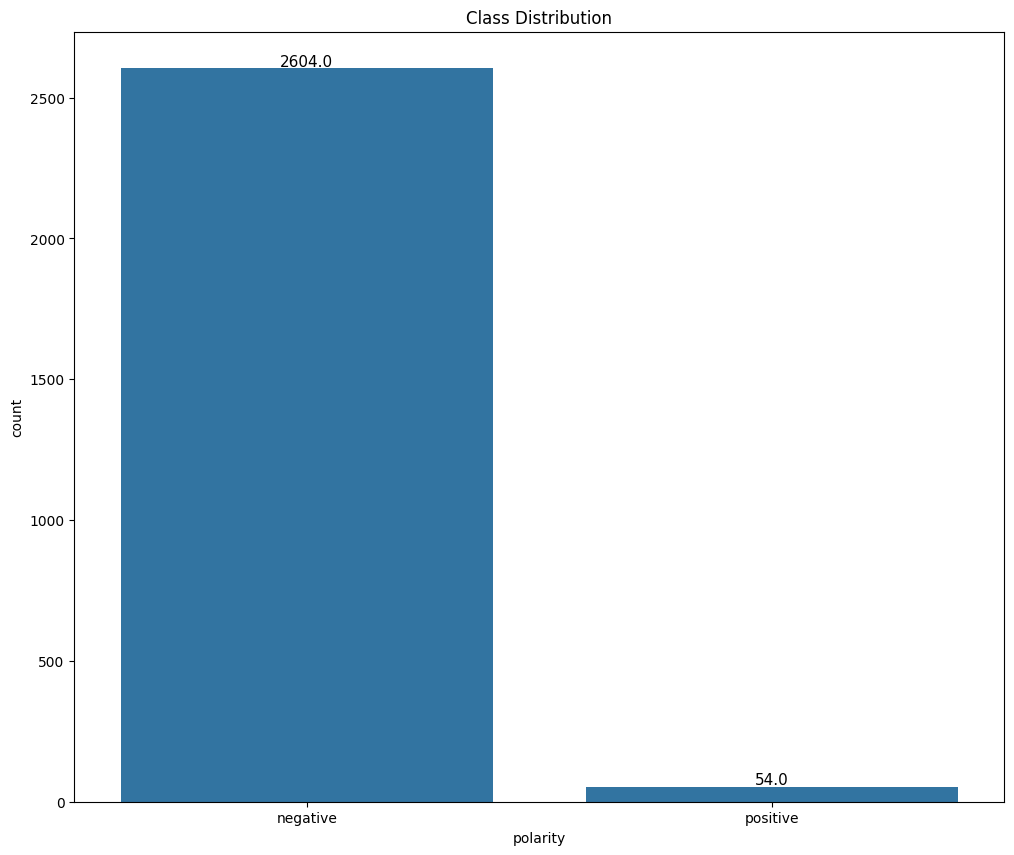

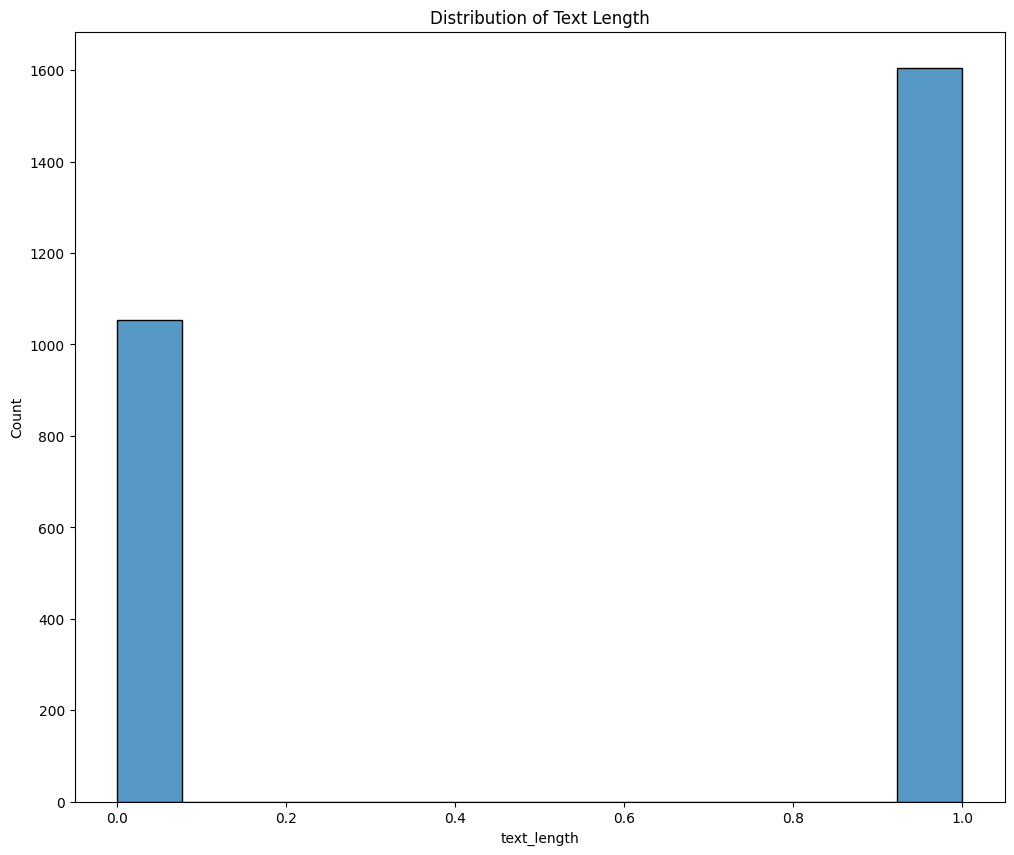

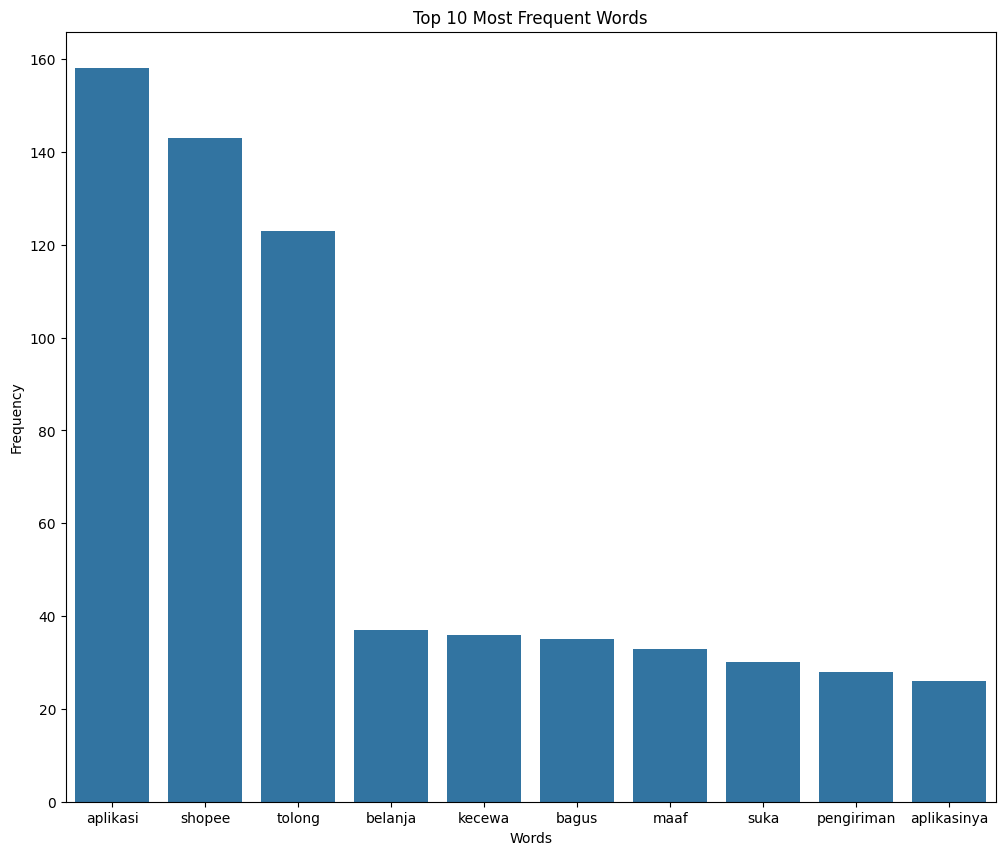

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(12, 10))

class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
  class_dist_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                           textcoords='offset points')

plt.show()

plt.figure(figsize=(12, 10))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribution of Text Length')
plt.show()

plt.figure(figsize=(12, 10))

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
sns.barplot(x=tfidf_df.sum().sort_values(ascending=False).head(10).index, y=tfidf_df.sum().sort_values(ascending=False).head(10).values)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

#Data Splitting

In [89]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,text_clean,text_casefolding,text_tokenizing,text_stopword,text_akhir,sentiment,polarity_score,polarity,text_length
0,5bd2cb2d-981f-499b-8287-e3d91df21da9,Liyana nuryati,https://play-lh.googleusercontent.com/a/ACg8ocJPHPRszuVy0wJ2jCthNzVHWBveQCYIK9T7kZB1fpGRwBldmA=mo,"maaf kasi rating 1. Karena shope benar-benar mengecewakan sekarang. aplikasi berat tidak juga dibuat ringan,tiap buka aplikasi pasti auto kebuka video/live sangat mengganggu,tiap mau klaim voucher selalu lemot padahal jaringan stabil, belum klaim sudah habis. Tahunan pakai shopee,baru sekarang kecewa,mohon diperbaiki aplikasinya terimakasih 🙏",1,23,3.48.28,2025-04-23 05:25:57,"Hi kak Liyana nuryati, maafudah buat gak nyaman. Aku saranin kakak bisa pastikan sudah gunakan aplikasi terbaru dan clear cache aplikasi kakak. Terkait kendala yg dialami akan dijadikan evaluasi agar performa aplikasi Shopee semakin baik ke depan nya. Kalo ada kendala, kakak bisa hubungi DM IG di @shopee_id ya. Stay safe kak ^NS",2025-04-23 06:35:08,maaf kasi rating Karena shope benarbenar mengecewakan sekarang aplikasi berat tidak juga dibuat ringantiap buka aplikasi pasti auto kebuka videolive sangat mengganggutiap mau klaim voucher selalu lemot padahal jaringan stabil belum klaim sudah habis Tahunan pakai shopeebaru sekarang kecewamohon diperbaiki aplikasinya terimakasih,maaf kasi rating karena shope benarbenar mengecewakan sekarang aplikasi berat tidak juga dibuat ringantiap buka aplikasi pasti auto kebuka videolive sangat mengganggutiap mau klaim voucher selalu lemot padahal jaringan stabil belum klaim sudah habis tahunan pakai shopeebaru sekarang kecewamohon diperbaiki aplikasinya terimakasih,"[maaf, kasi, rating, karena, shope, benarbenar, mengecewakan, sekarang, aplikasi, berat, tidak, juga, dibuat, ringantiap, buka, aplikasi, pasti, auto, kebuka, videolive, sangat, mengganggutiap, mau, klaim, voucher, selalu, lemot, padahal, jaringan, stabil, belum, klaim, sudah, habis, tahunan, pakai, shopeebaru, sekarang, kecewamohon, diperbaiki, aplikasinya, terimakasih]",[maaf],maaf,negative,0,negative,1
1,7f543a99-8ada-4dc5-9cca-dd95ef00eec8,Triputranto,https://play-lh.googleusercontent.com/a-/ALV-UjXxKs8u3GYrnvBy0RT3tryHVjnPuqJx42x4akQxVk-JxGAUIEhy,Setiap aplikasi dibuka selalu muncul video yg menggangu. Sudah aku atur biar tidak muncul tp masih selalu muncul. Mengganggu sekali apalagi pas keadaan volume hpnya di setelan maksimal.,1,13,3.48.28,2025-04-23 17:51:50,"Hi Kak Triputranto , maaf ya untuk kendala aplikasi yang kurang baik. aku saranin Kakak memperbarui aplikasi Shopee ya, pastiin juga jaringan internet dalam keadaan yang stabil dan lakukan Clear Cache pada aplikasi Shopeemu ya. Kalo masih ada kendala atau pertanyaan lain terkait Shopee bisa DM aku di IG @Shopee_ID ya Kak.Sehat selalu ^XK",2025-04-23 18:26:50,Setiap aplikasi dibuka selalu muncul video yg menggangu Sudah aku atur biar tidak muncul tp masih selalu muncul Mengganggu sekali apalagi pas keadaan volume hpnya di setelan maksimal,setiap aplikasi dibuka selalu muncul video yg menggangu sudah aku atur biar tidak muncul tp masih selalu muncul mengganggu sekali apalagi pas keadaan volume hpnya di setelan maksimal,"[setiap, aplikasi, dibuka, selalu, muncul, video, yg, menggangu, sudah, aku, atur, biar, tidak, muncul, tp, masih, selalu, muncul, mengganggu, sekali, apalagi, pas, keadaan, volume, hpnya, di, setelan, maksimal]",[],,negative,0,negative,0
2,d907638e-4c4c-4ac7-9747-7dd5e505b1b1,Deni Setiawan,https://play-lh.googleusercontent.com/a-/ALV-UjXezgatjk324V1Cia4JxYk6fN74x4pvu1guSxK-cihSuK9WCusu,"Shopee Video sangat mengganggu, ketika membuka aplikasi langsung ditujukan ke Shopee video bukan ke Home lagi, ini membuat aplikasi menjadi berat bahkan ketika mengklik produk dan ada tampilan live nya ini membuat layar ngefreeze. Padahal smartphone saya cukup bagus spesifikasinya.",3,8,3.48.28,2025-04-23 14:04:35,"Hi Kak Deni Setiawa

In [90]:
x = clean_df['text_akhir']
y = clean_df['polarity']

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [92]:
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
x_tfidf = tfidf.fit_transform(x)

features_df = pd.DataFrame(x_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df


,apk,aplikasi,aplikasinya,bagus,belanja,kecewa,maaf,mohon,pengiriman,shopee,suka,tolong,udah
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print("Akurasi Random Forest (Training):", accuracy_train_rf)
print("Akurasi Random Forest (Testing):", accuracy_test_rf)

Akurasi Random Forest (Training): 0.993414863593603
Akurasi Random Forest (Testing): 0.9906015037593985


In [99]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print("Akurasi Logistic Regression (Training):", accuracy_train_lr)
print("Akurasi Logistic Regression (Testing):", accuracy_test_lr)

Akurasi Logistic Regression (Training): 0.993414863593603
Akurasi Logistic Regression (Testing): 0.9906015037593985


In [97]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)

accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print("Akurasi Decision Tree (Training):", accuracy_train_dt)
print("Akurasi Decision Tree (Testing):", accuracy_test_dt)

Akurasi Decision Tree (Training): 0.993414863593603
Akurasi Decision Tree (Testing): 0.9906015037593985


In [100]:
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Training Accuracy': [accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Testing Accuracy': [accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})

accuracy_test_only = results_df[results_df['Testing Accuracy'] == results_df['Testing Accuracy'].max()]
print(accuracy_test_only)

                 Model  Training Accuracy  Testing Accuracy
0        Random Forest           0.993415          0.990602
1  Logistic Regression           0.993415          0.990602
2        Decision Tree           0.993415          0.990602


In [106]:
kalimat_baru = input("Masukkan kalimat: ")
kalimat_baru = cleaningText(kalimat_baru)
kalimat_baru = casefoldingText(kalimat_baru)
kalimat_baru = tokenizingText(kalimat_baru)
kalimat_baru = filteringText(kalimat_baru)
kalimat_baru = toSentence(kalimat_baru)

x_kalimat_baru = tfidf.transform([kalimat_baru])
prediksi_sentimen = logistic_regression.predict(x_kalimat_baru)

print("Kalimat Baru:", kalimat_baru)
print("Prediksi Sentimen:", prediksi_sentimen[0])

if prediksi_sentimen[0] == 'positive':
  print("Sentimen positif")
else:
  print("Sentimen negatif")

Masukkan kalimat: belanja mahal
Kalimat Baru: belanja
Prediksi Sentimen: negative
Sentimen negatif


In [107]:
!pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.21.0.37.6
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confect

In [108]:
!pip freeze > requirement.txt

In [109]:
from google.colab import files
files.download ('requirement.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>